In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
data = pd.read_csv('clean_layoffs.csv')

In [76]:
data.head()

,company,layoffs,report_date,Industry,HQ,company_status
0,Toast,550,2024-02-15,Point-of-sale platform,Boston,Public
1,Cisco,4250,2024-02-14,"Enterprise software, SaaS","San Jose, CA",Public
2,Upside Foods,16,2024-02-14,Alternative protein,"Berkeley, CA",Private
3,Paramount Global,800,2024-02-13,Logistics,"La Mirada, CA",Private
4,Instacart,250,2024-02-13,"Delivery, e-commerce",San Francisco,Public


In [77]:
data['report_date'] =  pd.to_datetime(data['report_date'], format='%Y-%m-%d')
data = data[data['report_date']<'2023-02-28']

In [78]:
data.dtypes

company                   object
layoffs                    int64
report_date       datetime64[ns]
Industry                  object
HQ                        object
company_status            object
dtype: object

In [79]:
df = data[['report_date', 'layoffs']].groupby('report_date').sum()
df['cummulative_layoffs'] = df['layoffs'].cumsum()

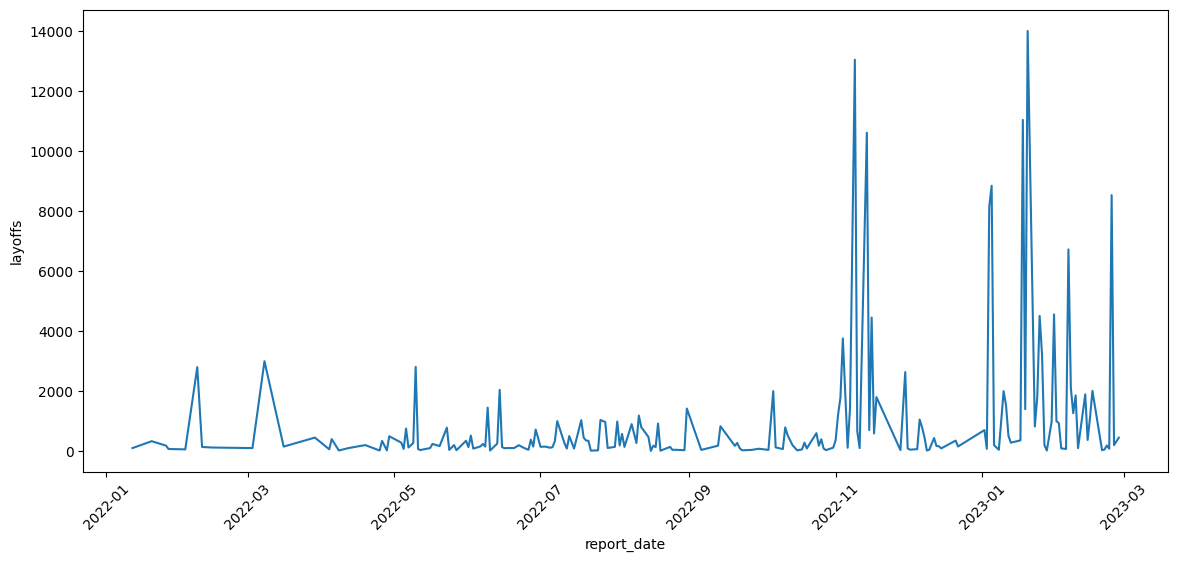

In [80]:
# number of people laid off by day
plt.figure(figsize=(14, 6))
sns.lineplot(x='report_date', y='layoffs', data=df)
plt.xticks(rotation=45)
plt.show()

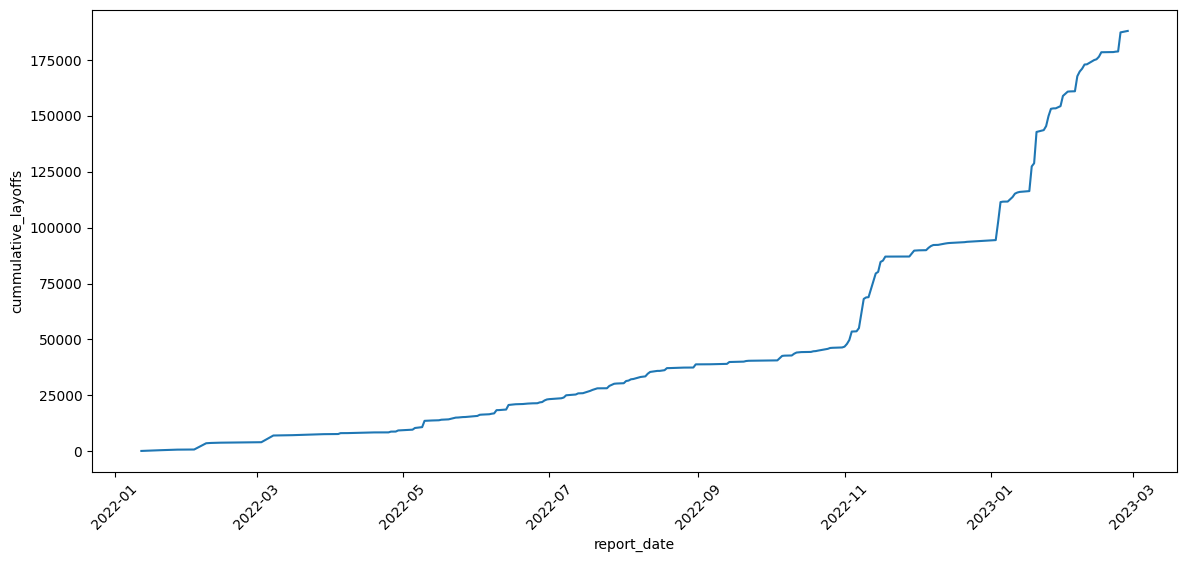

In [81]:
# number of people laid off overtime
plt.figure(figsize=(14, 6))
sns.lineplot(x='report_date', y='cummulative_layoffs', data=df)
plt.xticks(rotation=45)
plt.show()

In [82]:
# avarage rate of layoffs  per month before 2022-11-01
df1 = df[df.index<'2022-11-01']
df1['layoffs'].mean()

368.23809523809524

In [83]:
# avarage rate of layoffs  per month after 2022-11-01
df2 = df[df.index>='2022-11-01']
df2['layoffs'].mean()

1967.0416666666667

In [90]:
df_after = data[data['report_date']>='2022-11-01']
df_after.head()

,company,layoffs,report_date,Industry,HQ,company_status
384,Cerebral,285,2023-02-27,Health Care,San Francisco,Private
385,Palantir Technologies,75,2023-02-27,"Security, fraud detection",Denver,Public
386,Outreach,70,2023-02-27,Sales Tech,Seattle,Private
387,Stytch,19,2023-02-27,"security, data",San Francisco,Private
388,Twitter,200,2023-02-25,Social Media,San Francisco,Public


Text(0.5, 1.0, 'Donut Chart')

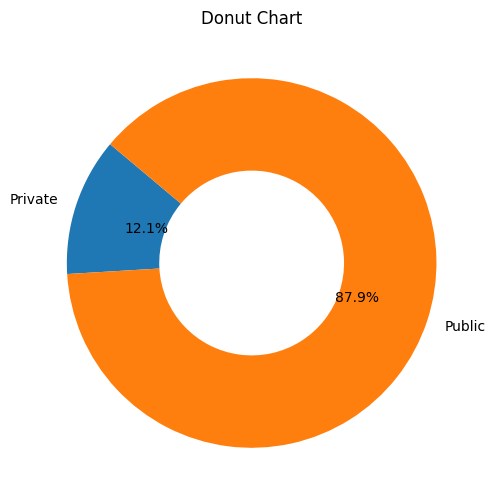

In [108]:
# layoff by company_status
df = df_after[['company_status', 'layoffs']].groupby('company_status').sum().reset_index()

plt.figure(figsize=(14, 6))
plt.pie(df['layoffs'], labels=df['company_status'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.5))
plt.title('Donut Chart')


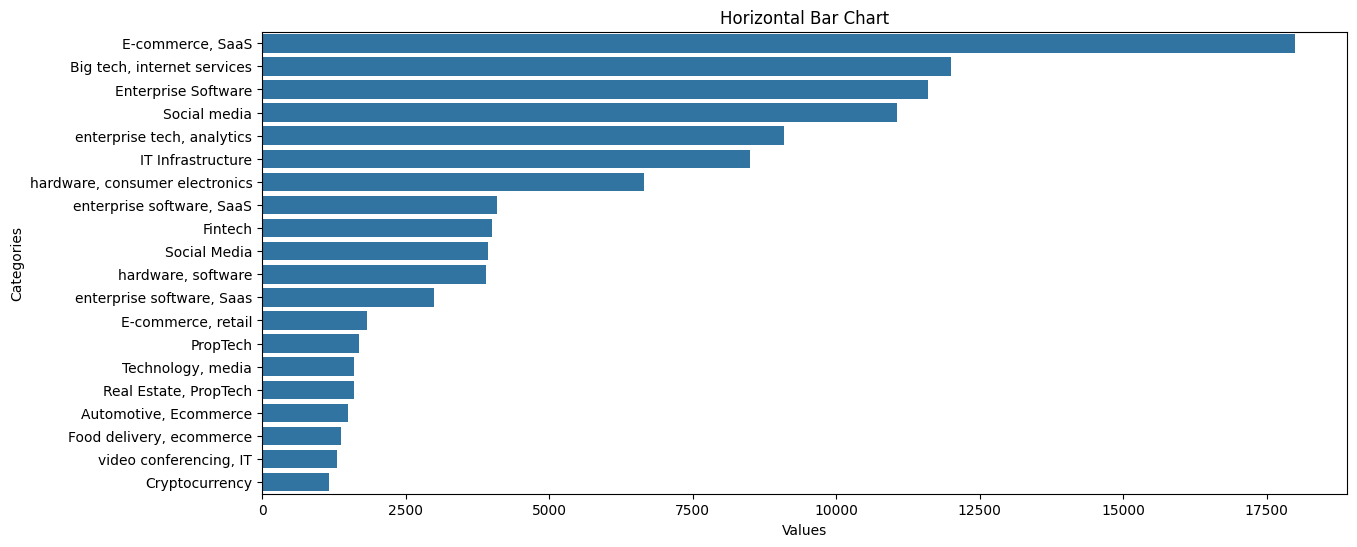

In [110]:
# top 20 industries laying off
df = df_after[['Industry', 'layoffs']].groupby('Industry').sum().reset_index().sort_values(by='layoffs', ascending=False).head(20)

# Create horizontal bar chart using Seaborn
plt.figure(figsize=(14, 6))
sns.barplot(x=df['layoffs'], y=df['Industry'], orient='h')

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Horizontal Bar Chart')

# Show plot
plt.show()

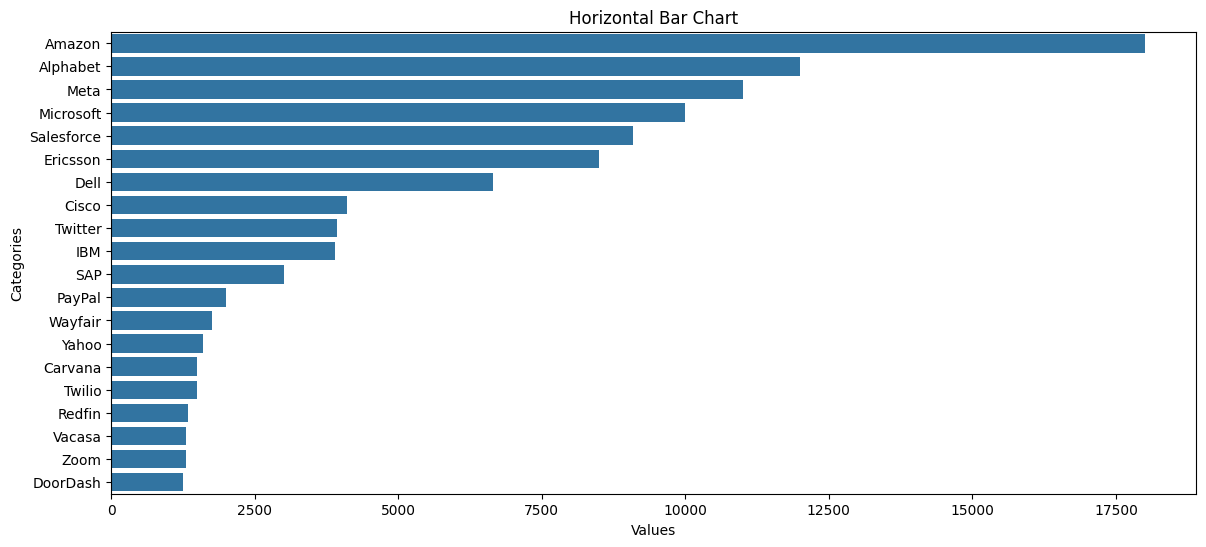

In [111]:
# top 20 companies laying off
df = df_after[['company', 'layoffs']].groupby('company').sum().reset_index().sort_values(by='layoffs', ascending=False).head(20)
# Create horizontal bar chart using Seaborn
plt.figure(figsize=(14, 6))
sns.barplot(x=df['layoffs'], y=df['company'], orient='h')

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Categories')
plt.title('Horizontal Bar Chart')

# Show plot
plt.show()